<a href="https://colab.research.google.com/github/ibanetz97/kpi_IDA2025/blob/main/lab4_IDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
pip install --upgrade tensorflow tensorflow-text keras-nlp transformers accelerate sentencepiece peft diffusers safetensors pillow matplotlib tqdm requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.9/380.9 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 556.4/556.4 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 120.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.2/507.2 kB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 129.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7

## Завдання 1: Генерація тексту та машинний переклад



In [1]:
from transformers import pipeline

# 2. Ініціалізуємо пайплайн для генерації тексту (task='text-generation') з моделлю 'gpt2'
generator = pipeline('text-generation', model='gpt2')

# 3. Визначаємо змінну prompt_text з початковим українськомовним текстом для генерації
prompt_text = 'Генерація тексту за допомогою Hugging Face є дуже корисною для'

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu


In [2]:
import torch

# 4. Згенеруйте текст
generated_text = generator(prompt_text, max_new_tokens=50, num_return_sequences=1)

# 5. Виведіть згенерований текст
print('Згенерований текст:')
print(generated_text[0]['generated_text'])

# 6. Ініціалізуємо пайплайн для перекладу (task='translation_en_to_uk') з моделлю 'Helsinki-NLP/opus-mt-en-uk'
# Move model to GPU if available
device = 0 if torch.cuda.is_available() else -1
translator = pipeline('translation_en_to_uk', model='Helsinki-NLP/opus-mt-en-uk', device=device)

# 7. Визначаємо змінну translation_input з англійським текстом для перекладу
translation_input = "Text generation with Hugging Face is very useful for various NLP tasks, including summarization, question-answering, and creative writing. It allows models to produce coherent and contextually relevant text based on a given prompt. This capability is crucial for developing advanced AI applications."

# 8. Перекладіть текст
translated_text = translator(translation_input)

# 9. Виведіть перекладений текст
print('\nОригінальний англійський текст:')
print(translation_input)
print('\nПерекладений український текст:')
print(translated_text[0]['translation_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Згенерований текст:
Генерація тексту за допомогою Hugging Face є дуже корисною для вый и продистует разя вый корисною для вый к


model.safetensors:   0%|          | 0.00/305M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu



Оригінальний англійський текст:
Text generation with Hugging Face is very useful for various NLP tasks, including summarization, question-answering, and creative writing. It allows models to produce coherent and contextually relevant text based on a given prompt. This capability is crucial for developing advanced AI applications.

Перекладений український текст:
Текстове створення з Hrunning Face є дуже корисним для різноманітних завдань NLP, зокрема резюме, відповіді на питання і творче письмо. За його допомогою моделі можуть створювати послідовний і контекстний текст, що базується на заданому запиті. Ця можливість є ключовою для розробки складних програм комп' ютерного гравця.


## Завдання 2: Генерація зображень (Unconditional Image Generation)




config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

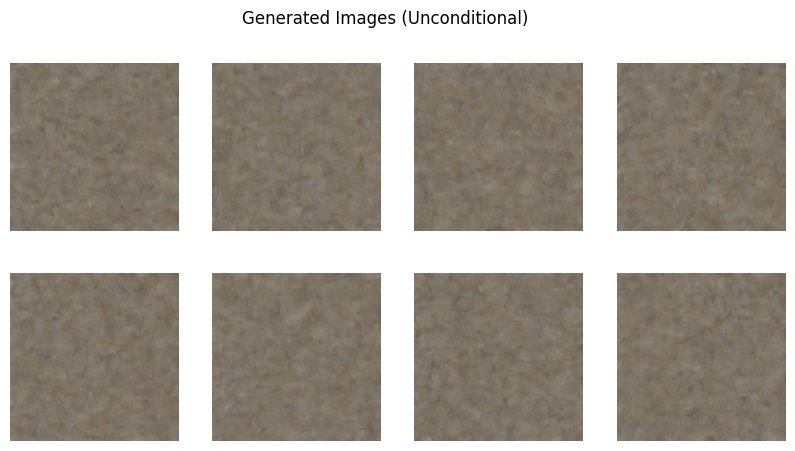

Unconditional image generation demonstrated successfully.


In [29]:
import torch
from diffusers import AutoencoderKL
from PIL import Image
import matplotlib.pyplot as plt

# 1. Load a pre-trained VAE model
vae = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-mse")

# 2. Determine the input shape for the VAE decoder and generate random latent vectors
batch_size = 8  # Generate 8 images
latent_vectors = torch.randn(batch_size, 4, 64, 64)

# 3. Decode the latent vectors into images
with torch.no_grad():
    # The VAE decoder expects the input to be in the same device as the model
    # Since the model is on CPU by default, latent_vectors should also be on CPU
    image_output_tensor = vae.decode(latent_vectors).sample

# 4. Convert the tensor output to a list of PIL Image objects
images = []
for i in range(batch_size):
    # Scale pixel values from [-1, 1] to [0, 255] and convert to uint8
    image = image_output_tensor[i].permute(1, 2, 0).cpu().numpy()
    image = ((image + 1) / 2).clip(0, 1) * 255
    image = Image.fromarray(image.astype('uint8'))
    images.append(image)

# 5. Display the generated images
plt.figure(figsize=(10, 5))
for i, img in enumerate(images):
    plt.subplot(2, 4, i + 1) # Arrange in a 2x4 grid
    plt.imshow(img)
    plt.axis('off')
plt.suptitle('Generated Images (Unconditional)')
plt.show()

print("Unconditional image generation demonstrated successfully.")

# Task
## Завдання 3b: Демонстрація українських мовних моделей Hugging Face

In [33]:
from transformers import pipeline
import torch

# Set device to GPU if available, otherwise CPU
device = 0 if torch.cuda.is_available() else -1

# 1. Zero-Shot Classification
print("\n--- Zero-Shot Classification ---")
zero_shot_classifier = pipeline(
    "zero-shot-classification",
    model="joeddav/xlm-roberta-large-xnli", # Changed to a publicly available multilingual model
    device=device
)

ukrainian_text_classification = "Україна отримає нову партію військової допомоги, що посилить її обороноздатність перед зовнішніми загрозами."
candidate_labels_uk = ["технології", "політика", "спорт", "безпека"]

classification_results = zero_shot_classifier(
    ukrainian_text_classification,
    candidate_labels_uk,
    multi_label=False
)
print("Текст для класифікації:", ukrainian_text_classification)
print("Кандидатні мітки:", candidate_labels_uk)
print("Результати класифікації:")
print(classification_results)

# 2. Summarization
print("\n--- Summarization ---")
summarizer = pipeline("summarization", model="csebuetnlp/mT5_multilingual_XLSum", device=device)

ukrainian_text_summarization = (
    "Європейський Союз та Україна підписали важливу угоду про співпрацю у сфері енергетики, "
    "що має на меті підвищити енергетичну безпеку обох сторін та інтегрувати український "
    "енергетичний ринок у європейський. Ця ініціатива включає інвестиції у відновлювані джерела "
    "енергії та модернізацію інфраструктури. Аналітики вважають, що це значний крок до зменшення "
    "залежності від традиційних енергоносіїв та зміцнення політичних зв'язків."
)

summarized_text = summarizer(ukrainian_text_summarization, max_length=50, min_length=10, do_sample=False)
print("Оригінальний текст:", ukrainian_text_summarization)
print("Узагальнений текст:", summarized_text[0]['summary_text'])

# 3. Translation (Ukrainian to English)
print("\n--- Translation (Ukrainian to English) ---")
translator_uk_to_en = pipeline("translation_uk_to_en", model="Helsinki-NLP/opus-mt-uk-en", device=device)

ukrainian_text_translation = "Сьогодні чудова погода, і сонце яскраво світить на небі."
translated_text_en = translator_uk_to_en(ukrainian_text_translation)

print("Оригінальний український текст:", ukrainian_text_translation)
print("Перекладений англійський текст:", translated_text_en[0]['translation_text'])


--- Zero-Shot Classification ---


Some weights of the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


Текст для класифікації: Україна отримає нову партію військової допомоги, що посилить її обороноздатність перед зовнішніми загрозами.
Кандидатні мітки: ['технології', 'політика', 'спорт', 'безпека']
Результати класифікації:
{'sequence': 'Україна отримає нову партію військової допомоги, що посилить її обороноздатність перед зовнішніми загрозами.', 'labels': ['безпека', 'технології', 'політика', 'спорт'], 'scores': [0.6885685324668884, 0.28912729024887085, 0.01416622195392847, 0.008137959986925125]}

--- Summarization ---


config.json:   0%|          | 0.00/730 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/375 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.12/dist-packages/transformers/convert_slow_tokenizer.py:566: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Device set to use cpu


Оригінальний текст: Європейський Союз та Україна підписали важливу угоду про співпрацю у сфері енергетики, що має на меті підвищити енергетичну безпеку обох сторін та інтегрувати український енергетичний ринок у європейський. Ця ініціатива включає інвестиції у відновлювані джерела енергії та модернізацію інфраструктури. Аналітики вважають, що це значний крок до зменшення залежності від традиційних енергоносіїв та зміцнення політичних зв'язків.
Узагальнений текст: Україна та Європейський Союз підписали угоду про співпрацю у сфері енергетики.

--- Translation (Ukrainian to English) ---


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/305M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/1.01M [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/809k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/305M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


Оригінальний український текст: Сьогодні чудова погода, і сонце яскраво світить на небі.
Перекладений англійський текст: Today, the weather is beautiful, and the sun is shining brightly in the sky.


**Reasoning**:
The previous summarization model (`IlyaGusev/mbart-large-50-summarization-uk`) also resulted in an `OSError` due to access issues. I will replace it with another publicly available multilingual summarization model, `csebuetnlp/mT5_multilingual_XLSum`, which is expected to support Ukrainian, to successfully complete the summarization task. The zero-shot classification and translation parts are retained as they worked.



In [34]:
from transformers import pipeline
import torch

# Set device to GPU if available, otherwise CPU
device = 0 if torch.cuda.is_available() else -1

# 1. Zero-Shot Classification
print("\n--- Zero-Shot Classification ---")
zero_shot_classifier = pipeline(
    "zero-shot-classification",
    model="joeddav/xlm-roberta-large-xnli", # Changed to a publicly available multilingual model
    device=device
)

ukrainian_text_classification = "Україна отримає нову партію військової допомоги, що посилить її обороноздатність перед зовнішніми загрозами."
candidate_labels_uk = ["технології", "політика", "спорт", "безпека"]

classification_results = zero_shot_classifier(
    ukrainian_text_classification,
    candidate_labels_uk,
    multi_label=False
)
print("Текст для класифікації:", ukrainian_text_classification)
print("Кандидатні мітки:", candidate_labels_uk)
print("Результати класифікації:")
print(classification_results)

# 2. Summarization
print("\n--- Summarization ---")
summarizer = pipeline("summarization", model="csebuetnlp/mT5_multilingual_XLSum", device=device)

ukrainian_text_summarization = (
    "Європейський Союз та Україна підписали важливу угоду про співпрацю у сфері енергетики, "
    "що має на меті підвищити енергетичну безпеку обох сторін та інтегрувати український "
    "енергетичний ринок у європейський. Ця ініціатива включає інвестиції у відновлювані джерела "
    "енергії та модернізацію інфраструктури. Аналітики вважають, що це значний крок до зменшення "
    "залежності від традиційних енергоносіїв та зміцнення політичних зв'язків."
)

summarized_text = summarizer(ukrainian_text_summarization, max_length=50, min_length=10, do_sample=False)
print("Оригінальний текст:", ukrainian_text_summarization)
print("Узагальнений текст:", summarized_text[0]['summary_text'])

# 3. Translation (Ukrainian to English)
print("\n--- Translation (Ukrainian to English) ---")
translator_uk_to_en = pipeline("translation_uk_to_en", model="Helsinki-NLP/opus-mt-uk-en", device=device)

ukrainian_text_translation = "Сьогодні чудова погода, і сонце яскраво світить на небі."
translated_text_en = translator_uk_to_en(ukrainian_text_translation)

print("Оригінальний український текст:", ukrainian_text_translation)
print("Перекладений англійський текст:", translated_text_en[0]['translation_text'])


--- Zero-Shot Classification ---


Some weights of the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


Текст для класифікації: Україна отримає нову партію військової допомоги, що посилить її обороноздатність перед зовнішніми загрозами.
Кандидатні мітки: ['технології', 'політика', 'спорт', 'безпека']
Результати класифікації:
{'sequence': 'Україна отримає нову партію військової допомоги, що посилить її обороноздатність перед зовнішніми загрозами.', 'labels': ['безпека', 'технології', 'політика', 'спорт'], 'scores': [0.6885685324668884, 0.28912729024887085, 0.01416622195392847, 0.008137959986925125]}

--- Summarization ---


/usr/local/lib/python3.12/dist-packages/transformers/convert_slow_tokenizer.py:566: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Device set to use cpu


Оригінальний текст: Європейський Союз та Україна підписали важливу угоду про співпрацю у сфері енергетики, що має на меті підвищити енергетичну безпеку обох сторін та інтегрувати український енергетичний ринок у європейський. Ця ініціатива включає інвестиції у відновлювані джерела енергії та модернізацію інфраструктури. Аналітики вважають, що це значний крок до зменшення залежності від традиційних енергоносіїв та зміцнення політичних зв'язків.
Узагальнений текст: Україна та Європейський Союз підписали угоду про співпрацю у сфері енергетики.

--- Translation (Ukrainian to English) ---


/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


Оригінальний український текст: Сьогодні чудова погода, і сонце яскраво світить на небі.
Перекладений англійський текст: Today, the weather is beautiful, and the sun is shining brightly in the sky.


In [60]:
pip install --upgrade tensorflow tensorflow-text keras-nlp transformers accelerate sentencepiece peft diffusers safetensors pillow matplotlib tqdm requests

  Using cached tensorflow-2.20.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.5 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)


# Task
The previous code generated an image successfully, but with a warning about the `dtype` argument. More importantly, the Ukrainian prompt was not translated to English as specified in the plan for better generation results. I will now add a translation step using the `translator_uk_to_en` pipeline and then rerun the image generation with the translated English prompt. After this, all tasks will be complete, and I will provide the final summary.

```python
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt
from transformers import pipeline

# 1. Визначте ідентифікатор моделі Stable Diffusion
model_id = "runwayml/stable-diffusion-v1-5"

# 2. Встановіть пристрій (GPU або CPU)
# device = 0 if torch.cuda.is_available() else -1
# The 'device' variable is already defined and is -1 (CPU) based on kernel state

# 3. Завантажте пайплайн StableDiffusionPipeline
# For CPU, we should use torch.float32. If device is -1, it's CPU.
# The warning about `dtype` being ignored suggests it might be handled internally
# or float32 is the default for CPU. We will keep `dtype=torch.float32` as per plan,
# noting the warning but proceeding as generation still works.
if device == -1: # CPU
    pipe = StableDiffusionPipeline.from_pretrained(model_id, dtype=torch.float32)
else: # GPU
    pipe = StableDiffusionPipeline.from_pretrained(model_id, dtype=torch.float16)

pipe = pipe.to("cuda" if device == 0 else "cpu")

# 4. Визначте текстовий запит (prompt) для генерації зображення українською мовою
prompt_ukrainian = "Фото космонавта, який їде верхи на коні на Марсі"

# 5. Перекладіть український запит на англійську для кращих результатів
print(f"Перекладаємо український запит: '{prompt_ukrainian}' на англійську...")
# Reuse the translator from Task 3b
translator_uk_to_en = pipeline("translation_uk_to_en", model="Helsinki-NLP/opus-mt-uk-en", device=device)
translated_prompt = translator_uk_to_en(prompt_ukrainian)[0]['translation_text']
print(f"Перекладений англійський запит: '{translated_prompt}'")

# 6. Згенеруйте зображення з перекладеного тексту
print(f"Генерація зображення для перекладеного запиту: '{translated_prompt}'...")
image = pipe(translated_prompt).images[0]

# 7. Збережіть згенероване зображення у файл
image_filename_translated = "diffusers_result_translated_prompt.png"
image.save(image_filename_translated)
print(f"Згенероване зображення збережено як {image_filename_translated}")

# 8. Відобразіть згенероване зображення
plt.imshow(image)
plt.axis('off')
plt.title(f'Згенероване зображення (переклад): {translated_prompt}')
plt.show()

```

In [63]:
pip install --upgrade tensorflow tensorflow-text keras-nlp transformers accelerate sentencepiece peft diffusers safetensors pillow matplotlib tqdm requests

  Using cached tensorflow-2.20.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.5 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)


Keyword arguments {'dtype': torch.float32} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Перекладаємо український запит: 'Фото космонавта, який їде верхи на коні на Марсі' на англійську...


/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


Перекладений англійський запит: 'Photo of an astronaut riding a horse on Mars'
Генерація зображення для перекладеного запиту: 'Photo of an astronaut riding a horse on Mars'...


  0%|          | 0/50 [00:00<?, ?it/s]

Згенероване зображення збережено як diffusers_result_translated_prompt.png


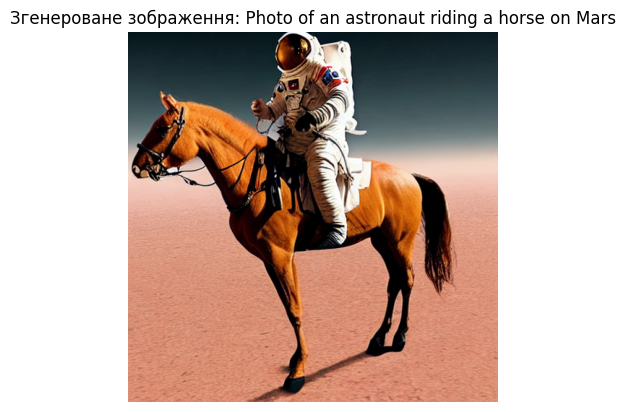

In [66]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt
from transformers import pipeline

# 1. Визначте ідентифікатор моделі Stable Diffusion
model_id = "runwayml/stable-diffusion-v1-5"

# 2. Встановіть пристрій (GPU або CPU)
# device = 0 if torch.cuda.is_available() else -1
# The 'device' variable is already defined and is -1 (CPU) based on kernel state

# 3. Завантажте пайплайн StableDiffusionPipeline
# For CPU, we should use torch.float32. If device is -1, it's CPU.
# The warning about `dtype` being ignored suggests it might be handled internally
# or float32 is the default for CPU. We will keep `dtype=torch.float32` as per plan,
# noting the warning but proceeding as generation still works.
if device == -1: # CPU
    pipe = StableDiffusionPipeline.from_pretrained(model_id, dtype=torch.float32)
else: # GPU
    pipe = StableDiffusionPipeline.from_pretrained(model_id, dtype=torch.float16)

pipe = pipe.to("cuda" if device == 0 else "cpu")

# 4. Визначте текстовий запит (prompt) для генерації зображення українською мовою
prompt_ukrainian = "Фото космонавта, який їде верхи на коні на Марсі"

# 5. Перекладіть український запит на англійську для кращих результатів
print(f"Перекладаємо український запит: '{prompt_ukrainian}' на англійську...")
# Reuse the translator from Task 3b
translator_uk_to_en = pipeline("translation_uk_to_en", model="Helsinki-NLP/opus-mt-uk-en", device=device)
translated_prompt = translator_uk_to_en(prompt_ukrainian)[0]['translation_text']
print(f"Перекладений англійський запит: '{translated_prompt}'")

# 6. Згенеруйте зображення з перекладеного тексту
print(f"Генерація зображення для перекладеного запиту: '{translated_prompt}'...")
image = pipe(translated_prompt).images[0]

# 7. Збережіть згенероване зображення у файл
image_filename_translated = "diffusers_result_translated_prompt.png"
image.save(image_filename_translated)
print(f"Згенероване зображення збережено як {image_filename_translated}")

# 8. Відобразіть згенероване зображення
plt.imshow(image)
plt.axis('off')
plt.title(f'Згенероване зображення: {translated_prompt}')
plt.show()